In [1]:
# Imports nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuration pour les graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Charger les données
df = pd.read_csv('../data/raw/premier_league_matches.csv')

print(f"📊 Dataset loaded!")
print(f"📦 Shape: {df.shape[0]} matches, {df.shape[1]} columns")
print(f"\n👀 First 5 rows:")
df.head()

📊 Dataset loaded!
📦 Shape: 760 matches, 6 columns

👀 First 5 rows:


,date,home_team,away_team,home_score,away_score,matchday
0,2023-08-11 19:00:00+00:00,Burnley FC,Manchester City FC,0,3,1
1,2023-08-12 12:00:00+00:00,Arsenal FC,Nottingham Forest FC,2,1,1
2,2023-08-12 14:00:00+00:00,AFC Bournemouth,West Ham United FC,1,1,1
3,2023-08-12 14:00:00+00:00,Brighton & Hove Albion FC,Luton Town FC,4,1,1
4,2023-08-12 14:00:00+00:00,Everton FC,Fulham FC,0,1,1


In [3]:
# ============================================
# STATISTIQUES DE BASE
# ============================================

print("📊 DATASET INFO")
print("=" * 50)

# Info générales
print(f"\n🔢 Nombre total de matchs: {len(df)}")
print(f"📅 Période: {df['date'].min()} à {df['date'].max()}")
print(f"⚽ Équipes uniques: {df['home_team'].nunique()}")

# Vérifier s'il y a des valeurs manquantes
print(f"\n🔍 Valeurs manquantes par colonne:")
print(df.isnull().sum())

# Types de données
print(f"\n📋 Types de données:")
print(df.dtypes)

📊 DATASET INFO

🔢 Nombre total de matchs: 760
📅 Période: 2023-08-11 19:00:00+00:00 à 2025-05-25 15:00:00+00:00
⚽ Équipes uniques: 23

🔍 Valeurs manquantes par colonne:
date          0
home_team     0
away_team     0
home_score    0
away_score    0
matchday      0
dtype: int64

📋 Types de données:
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
matchday       int64
dtype: object


In [4]:
# ============================================
# CORRIGER LE TYPE DE DATE
# ============================================

df['date'] = pd.to_datetime(df['date'])
print("✅ Date convertie en datetime\n")

# ============================================
# STATISTIQUES AVANCÉES
# ============================================

print("📊 STATISTIQUES DES SCORES")
print("=" * 50)

# Créer une colonne pour le résultat
df['result'] = df.apply(lambda row: 'Home Win' if row['home_score'] > row['away_score'] 
                                     else ('Away Win' if row['home_score'] < row['away_score'] 
                                           else 'Draw'), axis=1)

# Distribution des résultats
print("\n⚽ Distribution des résultats:")
print(df['result'].value_counts())
print(f"\nPourcentages:")
print(df['result'].value_counts(normalize=True) * 100)

# Stats des scores
print(f"\n📈 Moyenne de buts par match:")
print(f"  🏠 Domicile: {df['home_score'].mean():.2f}")
print(f"  ✈️  Extérieur: {df['away_score'].mean():.2f}")
print(f"  🎯 Total: {(df['home_score'] + df['away_score']).mean():.2f}")

print(f"\n🔥 Match avec le plus de buts:")
max_goals_match = df.loc[(df['home_score'] + df['away_score']).idxmax()]
print(f"  {max_goals_match['home_team']} {max_goals_match['home_score']}-{max_goals_match['away_score']} {max_goals_match['away_team']}")

✅ Date convertie en datetime

📊 STATISTIQUES DES SCORES

⚽ Distribution des résultats:
result
Home Win    330
Away Win    255
Draw        175
Name: count, dtype: int64

Pourcentages:
result
Home Win    43.421053
Away Win    33.552632
Draw        23.026316
Name: proportion, dtype: float64

📈 Moyenne de buts par match:
  🏠 Domicile: 1.66
  ✈️  Extérieur: 1.45
  🎯 Total: 3.11

🔥 Match avec le plus de buts:
  Tottenham Hotspur FC 3-6 Liverpool FC


/var/folders/br/fp62jz652ln9b1zzswjtws1h0000gn/T/ipykernel_42795/1618580003.py:44: UserWarning: Glyph 9917 (\N{SOCCER BALL}) missing from current font.
  plt.tight_layout()
/Users/rayanhidri/Desktop/soccer-predictor/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9917 (\N{SOCCER BALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


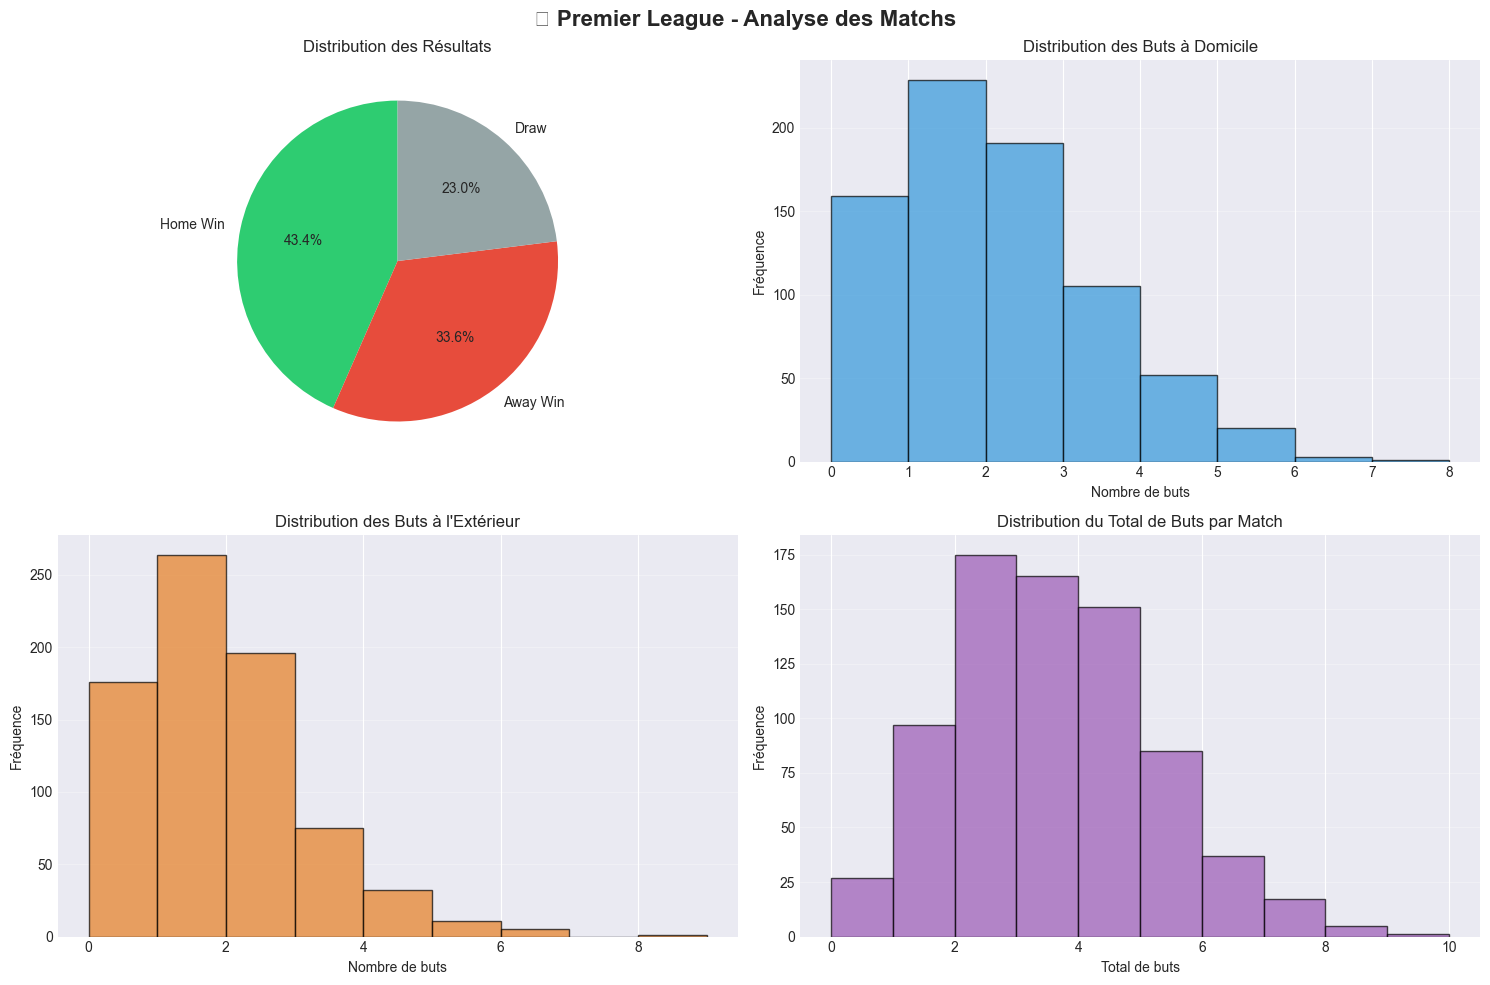


✅ Graphiques générés!


In [5]:
# ============================================
# VISUALISATIONS
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('⚽ Premier League - Analyse des Matchs', fontsize=16, fontweight='bold')

# 1. Distribution des résultats (pie chart)
result_counts = df['result'].value_counts()
colors = ['#2ecc71', '#e74c3c', '#95a5a6']  # Vert, Rouge, Gris
axes[0, 0].pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[0, 0].set_title('Distribution des Résultats')

# 2. Distribution des scores à domicile
axes[0, 1].hist(df['home_score'], bins=range(0, df['home_score'].max()+2), 
                color='#3498db', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution des Buts à Domicile')
axes[0, 1].set_xlabel('Nombre de buts')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Distribution des scores à l'extérieur
axes[1, 0].hist(df['away_score'], bins=range(0, df['away_score'].max()+2), 
                color='#e67e22', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribution des Buts à l\'Extérieur')
axes[1, 0].set_xlabel('Nombre de buts')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Total de buts par match
df['total_goals'] = df['home_score'] + df['away_score']
axes[1, 1].hist(df['total_goals'], bins=range(0, df['total_goals'].max()+2), 
                color='#9b59b6', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Distribution du Total de Buts par Match')
axes[1, 1].set_xlabel('Total de buts')
axes[1, 1].set_ylabel('Fréquence')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Graphiques générés!")

In [8]:
# ============================================
# TOP ÉQUIPES - ATTAQUE & DÉFENSE
# ============================================

print("🔥 TOP 10 - ATTAQUE À DOMICILE")
print("=" * 50)
home_attack = df.groupby('home_team')['home_score'].agg(['sum', 'mean', 'count'])
home_attack.columns = ['Total Goals', 'Avg per Match', 'Matches']
home_attack = home_attack.sort_values('Total Goals', ascending=False).head(10)
print(home_attack)

print("\n\n⚔️ TOP 10 - ATTAQUE À L'EXTÉRIEUR")
print("=" * 50)
away_attack = df.groupby('away_team')['away_score'].agg(['sum', 'mean', 'count'])
away_attack.columns = ['Total Goals', 'Avg per Match', 'Matches']
away_attack = away_attack.sort_values('Total Goals', ascending=False).head(10)
print(away_attack)

print("\n\n🛡️ TOP 10 - MEILLEURE DÉFENSE À DOMICILE")
print("=" * 50)
home_defense = df.groupby('home_team')['away_score'].agg(['sum', 'mean', 'count'])
home_defense.columns = ['Total Conceded', 'Avg per Match', 'Matches']
home_defense = home_defense.sort_values('Avg per Match').head(10)
print(home_defense)

print("\n\n✅ Exploration terminée!")

🔥 TOP 10 - ATTAQUE À DOMICILE
                           Total Goals  Avg per Match  Matches
home_team                                                     
Manchester City FC                  94       2.473684       38
Liverpool FC                        91       2.394737       38
Newcastle United FC                 89       2.342105       38
Arsenal FC                          83       2.184211       38
Aston Villa FC                      82       2.157895       38
Chelsea FC                          79       2.078947       38
Tottenham Hotspur FC                73       1.921053       38
Brentford FC                        69       1.815789       38
Crystal Palace FC                   61       1.605263       38
Brighton & Hove Albion FC           60       1.578947       38


⚔️ TOP 10 - ATTAQUE À L'EXTÉRIEUR
                           Total Goals  Avg per Match  Matches
away_team                                                     
Liverpool FC                        81       2.13157

In [9]:
# ============================================
# RÉSUMÉ DE L'EXPLORATION
# ============================================

print("=" * 60)
print("📊 RÉSUMÉ - EXPLORATION DES DONNÉES")
print("=" * 60)

print(f"\n📦 Dataset: {len(df)} matchs de Premier League")
print(f"📅 Période: {df['date'].min().date()} à {df['date'].max().date()}")
print(f"⚽ Équipes: {df['home_team'].nunique()} uniques")

print("\n🏆 INSIGHTS CLÉS:")
print("  1. Home advantage: 43.4% victoires domicile vs 33.6% extérieur")
print("  2. Moyenne: 1.66 buts domicile, 1.45 buts extérieur")
print("  3. Top attaque: Man City (94 buts home), Liverpool (81 buts away)")
print("  4. Top défense: Arsenal & Liverpool (0.87 buts encaissés home)")
print("  5. Match le plus fou: Tottenham 3-6 Liverpool (9 buts!)")

print("\n🎯 PROCHAINES ÉTAPES:")
print("  1. Pandas bootcamp pour maîtriser les bases")
print("  2. Feature engineering (forme récente, valeur marchande, etc.)")
print("  3. Entraînement des modèles ML")

print("\n✅ Exploration terminée avec succès!")

📊 RÉSUMÉ - EXPLORATION DES DONNÉES

📦 Dataset: 760 matchs de Premier League
📅 Période: 2023-08-11 à 2025-05-25
⚽ Équipes: 23 uniques

🏆 INSIGHTS CLÉS:
  1. Home advantage: 43.4% victoires domicile vs 33.6% extérieur
  2. Moyenne: 1.66 buts domicile, 1.45 buts extérieur
  3. Top attaque: Man City (94 buts home), Liverpool (81 buts away)
  4. Top défense: Arsenal & Liverpool (0.87 buts encaissés home)
  5. Match le plus fou: Tottenham 3-6 Liverpool (9 buts!)

🎯 PROCHAINES ÉTAPES:
  1. Pandas bootcamp pour maîtriser les bases
  2. Feature engineering (forme récente, valeur marchande, etc.)
  3. Entraînement des modèles ML

✅ Exploration terminée avec succès!
